# Lab 4 Classification with R

## Packages

If you are having trouble, use MyBinder: https://z.umn.edu/idsc4444mybinder

If you are using MyBinder, you can comment out the `install.packages` lines. As I have installed them for you, so you don't have to waste time waiting for installation.

In [1]:
#Install and Load the following packages, also all available on Anaconda Navigator
# install.packages("caret")
# install.packages("rpart")
# install.packages("rpart.plot")
# install.packages("e1071")

# remember, after installing the packages, you need to load them:

library("caret")
library("e1071")
library("rpart")
library("rpart.plot")

Loading required package: lattice

Loading required package: ggplot2



## Dataset

We will use the dataset customer_churn containing data from a
telecommunication company that offers phone and internet services about
their customers

**Objective**: build classification models to predict whether a customer will
churn or not.

In [2]:
#Load the dataset customer_churn
data <- read.csv("customer_churn.csv")

## Splitting the Dataset

Before implementing any classification method, we need to randomly split our dataset into
training and testing dataset

Let us use `createDataPartition()`

- The `y` parameter takes the class/outcome variable
- The `p` parameter takes the proportion of training data
- The `list` parameter controls the output format. If set to be `TRUE`, it will output a list, otherwise it will output a `data.frame`.
- Note: since the partition is randomly created, the results may be slightly different for each of us

In [3]:
set.seed(1234)

In [4]:
# createDataPartition is going to randomly pick 70% of our existing observations 
# and put them into the vector train_rows
train_rows <- createDataPartition(y = data$Churn., p = 0.7, list = FALSE)

`train_rows` now includes the index of rows in dataset. All rows that is in `train_rows` will go to the training set, and the rest not in there will go to the testing set.

In [5]:
# each element in train_rows is the index of rows in dataset
head(train_rows)

Resample1
1
2
3
5
6
7


Now, let's split the dataset into training and testing data:

In [6]:
# Create the training data using the randomly picked observations from before
data_train <- data[train_rows, ]

We can use the minus sign `-` to select every row that is not in `train_rows`

In [7]:
# Create the test data, by taking all the remaining observations that 
# were not included in data_train
data_test <- data[-train_rows, ]

## Normalizing the data

Next, we need to normalize the data. In this case, we use standardization

First, let us create a copy of the training and testing data

In [8]:
data_train_stand <- data_train
data_test_stand <- data_test

In [9]:
#load the package standardize
library(standardize)

### Which columns to be normalized?

Let's first take a look at the columns

In [10]:
summary(data)

 Account.Length    Int.l.Plan        VMail.Plan     VMail.Message   
 Min.   :  1.0   Min.   :0.00000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 74.0   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.: 0.000  
 Median :100.0   Median :0.00000   Median :0.0000   Median : 0.000  
 Mean   :100.9   Mean   :0.09873   Mean   :0.2762   Mean   : 8.067  
 3rd Qu.:127.0   3rd Qu.:0.00000   3rd Qu.:1.0000   3rd Qu.:19.000  
 Max.   :243.0   Max.   :1.00000   Max.   :1.0000   Max.   :51.000  
    Day.Mins       Day.Calls       Day.Charge       Eve.Mins       Eve.Calls  
 Min.   :  0.0   Min.   :  0.0   Min.   : 0.00   Min.   :  0.0   Min.   :  0  
 1st Qu.:144.0   1st Qu.: 87.0   1st Qu.:24.48   1st Qu.:166.7   1st Qu.: 87  
 Median :179.4   Median :101.0   Median :30.50   Median :201.6   Median :100  
 Mean   :179.9   Mean   :100.4   Mean   :30.58   Mean   :201.1   Mean   :100  
 3rd Qu.:216.3   3rd Qu.:114.0   3rd Qu.:36.77   3rd Qu.:235.9   3rd Qu.:113  
 Max.   :350.8   Max.   :165.0   Max.   :59

**Remember**: we do not standardize the outcome (class) variable

So, we need to exclude the variable Churn.

We will standardize variables from 1 to 17, using the `scale` function provided in the `standardize` library.

In [11]:
#We apply the function scale to the data_train_stand and data_test_stand
data_train_stand[, 1:17] <- apply(data_train_stand[, 1:17], MARGIN = 2, FUN = scale)
data_test_stand[, 1:17] <- apply(data_test_stand[, 1:17], MARGIN = 2, FUN = scale)

# K-NN

Classification algorithms are implemented in R using the `train()` function

You need to specify:
- The training dataset
- The method you wish to use
- The `Y` (outcome) and `X` (predictors) of your model. If you want to use all the predictors (attributes) you have in your dataset, you can just specify the `Y ~`.

As a convention, we also call trained model a "fitted" model.

In [12]:
fitKNN <- train(data = data_train_stand, method = "knn", Churn.~.)
fitKNN

k-Nearest Neighbors 

2100 samples
  17 predictor
   2 classes: 'False.', 'True.' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2100, 2100, 2100, 2100, 2100, 2100, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8725433  0.3797903
  7  0.8788033  0.3779617
  9  0.8811396  0.3722043

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

---

👆 `train()` will automatically and internally resample your training data into training data and validation data. It will automatically try different `k`, then evaluate the performance based on the accuracy tested on the internal validation set.

---

**Interpreting the results**

```
2100 samples
  17 predictor
   2 classes: 'False.', 'True.' 
```

👆 The output shows how many observations were
used (2100), how many attributes (17) and how
many classes the class variable has (2, False and
True).

```
  k  Accuracy   Kappa    
  5  0.8725433  0.3797903
  7  0.8788033  0.3779617
  9  0.8811396  0.3722043
```

👆 It also shows the accuracy of the model run with
different values of k (different number of nearest neighbors)

```
Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.
```

👆 The algorithm will pick the model with the
highest accuracy

---

We can also use the following code to manually define different `k`.

In [13]:
# We can set the values of k we would like the method to use
grid <- expand.grid(k = c(3,5,7,9,12))

fitKNN <- train(data = data_train_stand, method = "knn", Churn.~., 
                trControl = trainControl(search = "grid"), tuneGrid = grid)
fitKNN

k-Nearest Neighbors 

2100 samples
  17 predictor
   2 classes: 'False.', 'True.' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2100, 2100, 2100, 2100, 2100, 2100, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.8627427  0.3768425
   5  0.8764603  0.3911745
   7  0.8821230  0.3862454
   9  0.8851111  0.3781819
  12  0.8815734  0.3323160

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

## Plotting K-NN Accuracy

Plot how accuracy changes with different values of `k`

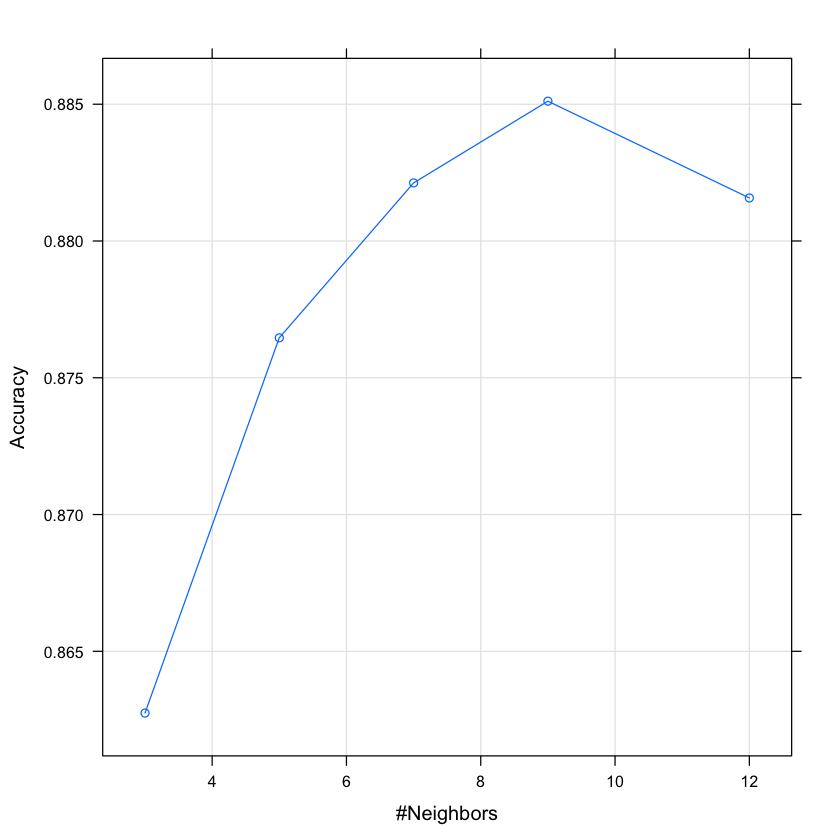

In [14]:
#Plot how accuracy of the model changes with number of k
#Note: since the model is trained on a random set of data, we may get slightly different results 
plot(fitKNN, ylab = "Accuracy")

## Predicting new data using K-NN using Testing Data

Get the predictions and then create the confusion matrix to assess the performance of the
model.

Use the k-NN model we just trained to predict the classes of the observations in the 
testing data.

In other words, we are going to use the model we built on the testing data
and try to use it to predict the class (outcome) of the observations in the testing data.

Note that since we also know the "real" value for the class variable for the observations
in the testing data, we can then compare the predictions obtained with the model with the
real value to evaluate how good our model is.

In [15]:
knn_predictions <- predict(fitKNN, data_test_stand) # note that we are using testing data now

In [16]:
head(knn_predictions)

[1] False. False. False. False. False. False.
Levels: False. True.

## Confusion Matrix

Use the *Confusion Matrix* to evaluate the performance of the model

We use the function `confusionMatrix` and input the predictions we want to use to create the matrix.

- The predictions that our model have made
- The true label (class) of the testing data
- The `mode` option controls what type of measures we get.
    - if we use `mode = "prec_recall"` we will get `precision` and `recall` for the class that has been set as the "positive" class

In [17]:
confusionMatrix(as.factor(knn_predictions), as.factor(data_test_stand$Churn.), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    764   104
    True.       4    26
                                          
               Accuracy : 0.8797          
                 95% CI : (0.8566, 0.9003)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.01886         
                                          
                  Kappa : 0.2863          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.8802          
                 Recall : 0.9948          
                     F1 : 0.9340          
             Prevalence : 0.8552          
         Detection Rate : 0.8508          
   Detection Prevalence : 0.9666          
      Balanced Accuracy : 0.5974          
                                          
       'Positive' Class : False.          
                                          

👆 The algorithm will randomly pick one class as "Positive" class, so we may want to manually specify the "Positive" class.

In [18]:
confusionMatrix(as.factor(knn_predictions), as.factor(data_test_stand$Churn.), mode = "prec_recall", positive = "True.")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    764   104
    True.       4    26
                                          
               Accuracy : 0.8797          
                 95% CI : (0.8566, 0.9003)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.01886         
                                          
                  Kappa : 0.2863          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.86667         
                 Recall : 0.20000         
                     F1 : 0.32500         
             Prevalence : 0.14477         
         Detection Rate : 0.02895         
   Detection Prevalence : 0.03341         
      Balanced Accuracy : 0.59740         
                                          
       'Positive' Class : True.           
                                          

---

**Tip**: 
If you have the following error, remember to wrap your input data with `as.factor()`

```Error: `data` and `reference` should be factors with the same levels.```

---

Without specifying `mode`, in this case, to distinguish between the two classes, the matrix will use the terms
Sensitivity, Specificity, PPV and NPV.

Sensitivity and PPV will refer to the class defined as "positive", that is reported at the 
bottom of the output. Specificity and NPV will refer to the other class

In [19]:
confusionMatrix(as.factor(knn_predictions), as.factor(data_test_stand$Churn.), positive = "True.")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    764   104
    True.       4    26
                                          
               Accuracy : 0.8797          
                 95% CI : (0.8566, 0.9003)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.01886         
                                          
                  Kappa : 0.2863          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.20000         
            Specificity : 0.99479         
         Pos Pred Value : 0.86667         
         Neg Pred Value : 0.88018         
             Prevalence : 0.14477         
         Detection Rate : 0.02895         
   Detection Prevalence : 0.03341         
      Balanced Accuracy : 0.59740         
                                          
       'Positive' Class : True.           
               

# Decision Tree

- Train a decision tree using the same `train()` function
- But this time we specify `rpart` as method (recursive partitioning).
- Specify your outcome variable and the predictors you want to use: `Churn. ~.`
- If you want to use all the attributes, simply use the symbol `~` followed by `.`
- In the case of a decision tree, **the data does not get normalized** because the decision tree uses the concept of Entropy and not a distance measure

In [20]:
fitDT_daymins_only <- train(data = data_train, method = "rpart", Churn. ~ Day.Mins + Day.Calls) # in this case we only used Day.Mins and Day.Calls

In [21]:
fitDT_daymins_only$finalModel # only uses Day.Mins and Day.Calls as the predictor

n= 2100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 2100 306 False. (0.8542857 0.1457143)  
  2) Day.Mins< 256.35 1928 215 False. (0.8884855 0.1115145) *
  3) Day.Mins>=256.35 172  81 True. (0.4709302 0.5290698)  
    6) Day.Mins< 284.15 115  48 False. (0.5826087 0.4173913) *
    7) Day.Mins>=284.15 57  14 True. (0.2456140 0.7543860) *

---
Above is a demo of how you can select predictors manually, usually we use all available predictors:

In [22]:
fitDT <- train(data = data_train, method = "rpart", Churn. ~ .) # in this case we use all the attributes

In [23]:
fitDT$finalModel

n= 2100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2100 306 False. (0.8542857 0.1457143)  
   2) Day.Mins< 256.35 1928 215 False. (0.8884855 0.1115145)  
     4) CustServ.Calls< 3.5 1785 141 False. (0.9210084 0.0789916) *
     5) CustServ.Calls>=3.5 143  69 True. (0.4825175 0.5174825)  
      10) Day.Mins>=174.35 65  12 False. (0.8153846 0.1846154) *
      11) Day.Mins< 174.35 78  16 True. (0.2051282 0.7948718) *
   3) Day.Mins>=256.35 172  81 True. (0.4709302 0.5290698)  
     6) VMail.Plan>=0.5 48   5 False. (0.8958333 0.1041667) *
     7) VMail.Plan< 0.5 124  38 True. (0.3064516 0.6935484) *

In [24]:
# better representation
rpart.rules(fitDT$finalModel)

,.outcome,,,,,,,,,,,,,,
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,0.08,when,Day.Mins,<,256,,,&,CustServ.Calls,<,4,,,,
6,0.10,when,Day.Mins,>=,,,256,,,,,&,VMail.Plan,is,1
10,0.18,when,Day.Mins,is,174,to,256,&,CustServ.Calls,>=,4,,,,
7,0.69,when,Day.Mins,>=,,,256,,,,,&,VMail.Plan,is,0
11,0.79,when,Day.Mins,<,174,,,&,CustServ.Calls,>=,4,,,,


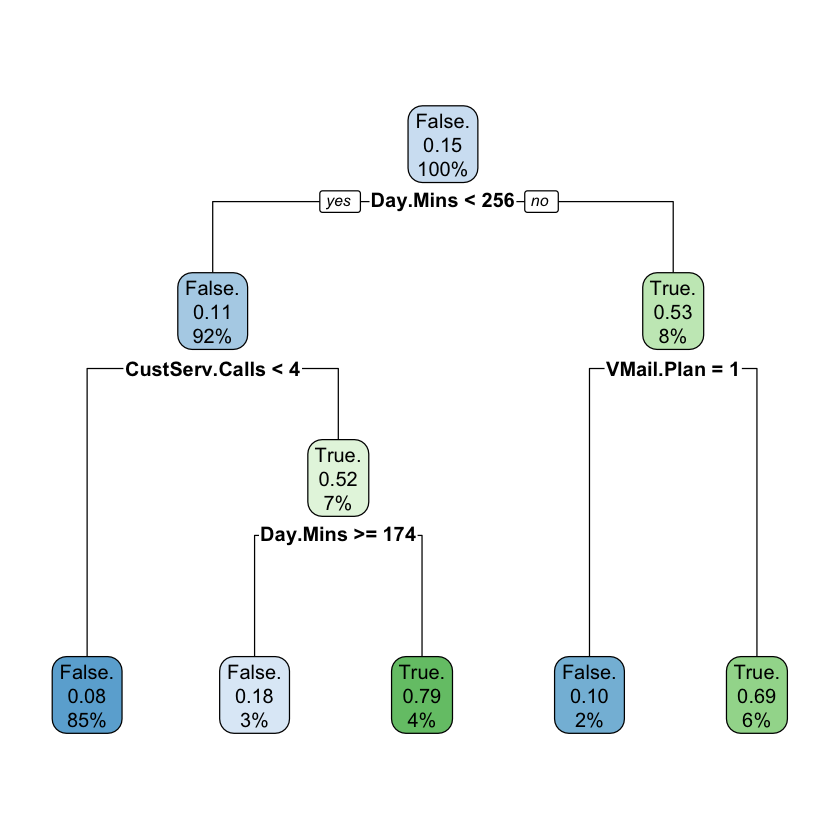

In [25]:
# plot the tree
rpart.plot(fitDT$finalModel)

**How to interpret each rectangle**
- The root node:
    - The term `False` indicates what would be the classification for that node/partition, **as if that is the leaf node**
    - The number `0.15` indicated the probability of **the other class**; in this example, `False` is the baseline class, as such 0.15 is the probability of True.
    - The 100% indicates the proportion of training data included in that partition. The root node, of course, contains 100% of the data.
- The light blue decision node `Day.Mins >= 174`:
    - `True` says that in that partition/node the classification would be `True` **if we stop there**.
    - `0.52` means that 52% of the data points in that node is the opposite of the baseline class, so in this case 52% is `True`.
    - The `7%` indicates that this node covers 7% of the cases in the entire dataset.

## Predicting using Decision Tree on Testing Data



In [26]:
#get the predictions from the tree
DT_predictions <- predict(fitDT$finalModel, newdata = data_test, type = "class")

In [27]:
head(data_test)

,Account.Length,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
8,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
9,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
10,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
11,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.


In [28]:
head(as.factor(DT_predictions))

4      8      9     10     11     15 
 True. False. False. False.  True.  True. 
Levels: False. True.

## Confusion Matrix

In [29]:
#Create the confusionMatrix to evaluate the performance of the model
confusionMatrix(as.factor(DT_predictions), as.factor(data_test$Churn.), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    731    66
    True.      37    64
                                          
               Accuracy : 0.8853          
                 95% CI : (0.8626, 0.9054)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.004945        
                                          
                  Kappa : 0.4895          
                                          
 Mcnemar's Test P-Value : 0.005799        
                                          
              Precision : 0.9172          
                 Recall : 0.9518          
                     F1 : 0.9342          
             Prevalence : 0.8552          
         Detection Rate : 0.8140          
   Detection Prevalence : 0.8875          
      Balanced Accuracy : 0.7221          
                                          
       'Positive' Class : False.          
                                          

In this case, we care more about churn customers, so we regard `True` as "Positive".

In [30]:
confusionMatrix(as.factor(DT_predictions), as.factor(data_test$Churn.), mode = "prec_recall", positive = "True.")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    731    66
    True.      37    64
                                          
               Accuracy : 0.8853          
                 95% CI : (0.8626, 0.9054)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.004945        
                                          
                  Kappa : 0.4895          
                                          
 Mcnemar's Test P-Value : 0.005799        
                                          
              Precision : 0.63366         
                 Recall : 0.49231         
                     F1 : 0.55411         
             Prevalence : 0.14477         
         Detection Rate : 0.07127         
   Detection Prevalence : 0.11247         
      Balanced Accuracy : 0.72207         
                                          
       'Positive' Class : True.           
                                          

In [31]:
#If we want to get the measures for both classes, we can avoid the option mode
confusionMatrix(as.factor(DT_predictions), as.factor(data_test$Churn.), positive = "True.")

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    731    66
    True.      37    64
                                          
               Accuracy : 0.8853          
                 95% CI : (0.8626, 0.9054)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.004945        
                                          
                  Kappa : 0.4895          
                                          
 Mcnemar's Test P-Value : 0.005799        
                                          
            Sensitivity : 0.49231         
            Specificity : 0.95182         
         Pos Pred Value : 0.63366         
         Neg Pred Value : 0.91719         
             Prevalence : 0.14477         
         Detection Rate : 0.07127         
   Detection Prevalence : 0.11247         
      Balanced Accuracy : 0.72207         
                                          
       'Positive' Class : True.           
               

## Probabilistic Prediction

- Rather than getting the class predictions, we can get the probabilities: we can get what is the
probability that a certain observation belongs to one class or the other
- By default, a cut-off of 50% is used
- Nevertheless, we can change the cutoff value depending on the context
- Example: in this case, we want to be sure to not miss any potential Churn. In other words, we want to avoid to classify a customer as `False` Churn if there is a decent probability that is a `True` Churn. We care about the **recall for the class True** more than the overall accuracy of the model or precision.
    - We can increase the cut-off for `False.`, so that the algorithm will classify a customer as `False` Churn only if the probability is really high

In [32]:
#First, get the predicted probabilities
#we still use the function predict, but now we specify type = "prob"
#also, we save the results in a dataframe
DT_prob <- as.data.frame(predict(fitDT$finalModel, newdata = data_test, type = "prob"))

In [33]:
#next, we create a new column in the dataframe just created that is going to assign to each
#observation "False" or "True" based on the cutoff
#in this example, we specify that if the Probablity of being False is > 0.87, then assign False
#if it is lower, then we assign True

DT_prob$pred_class <- ifelse(DT_prob$False. > 0.87, "False.", "True.")

In [34]:
#transform the new created column into a class variable by using the as.factor()
DT_prob$pred_class<- as.factor(DT_prob$pred_class)

In [35]:
confusionMatrix(as.factor(DT_prob$pred_class), as.factor(data_test$Churn.))

Confusion Matrix and Statistics

          Reference
Prediction False. True.
    False.    705    60
    True.      63    70
                                          
               Accuracy : 0.863           
                 95% CI : (0.8388, 0.8849)
    No Information Rate : 0.8552          
    P-Value [Acc > NIR] : 0.2711          
                                          
                  Kappa : 0.4521          
                                          
 Mcnemar's Test P-Value : 0.8569          
                                          
            Sensitivity : 0.9180          
            Specificity : 0.5385          
         Pos Pred Value : 0.9216          
         Neg Pred Value : 0.5263          
             Prevalence : 0.8552          
         Detection Rate : 0.7851          
   Detection Prevalence : 0.8519          
      Balanced Accuracy : 0.7282          
                                          
       'Positive' Class : False.          
               

👆 We have a much higher sensitivity of `0.9180` versus `0.49231`, but the accuracy only dropped from `0.8853` to `0.863`!